In [1]:
!pip install keras-tcn
!pip install -U finance-datareader

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

/home/work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-01-25 01:10:25.046204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 01:10:25.207151: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-25 01:10:29.019436: W tensorflow/compiler/xla/stream_executor/platform/default/

In [3]:
kospi_train = fdr.DataReader('KS11', '1990-01-01','2017-12-31')['Close']
print(kospi_train.head())
print(kospi_train)
print(kospi_train.shape)
print(kospi_train.isnull().any())

Date
1996-12-11    704.679993
1996-12-12    689.380005
1996-12-13    689.070007
1996-12-16    673.919983
1996-12-17    663.349976
Name: Close, dtype: float64
Date
1996-12-11     704.679993
1996-12-12     689.380005
1996-12-13     689.070007
1996-12-16     673.919983
1996-12-17     663.349976
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 5341, dtype: float64
(5341,)
True


In [4]:
kospi_test = fdr.DataReader('KS11', '2018-01-01')['Close']
print(kospi_test)
print(kospi_test.shape)
print(kospi_test.isnull().any())

Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-17    2379.389893
2023-01-18    2368.320068
2023-01-19    2380.340088
2023-01-20    2395.260010
2023-01-25    2427.969971
Name: Close, Length: 1246, dtype: float64
(1246,)
False


In [5]:
kospi_train = kospi_train.dropna()
kospi_test = kospi_test.dropna()

print(kospi_train)
print(kospi_train.isnull().any())
print(kospi_test)
print(kospi_test.isnull().any())

Date
1996-12-11     704.679993
1996-12-12     689.380005
1996-12-13     689.070007
1996-12-16     673.919983
1996-12-17     663.349976
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 5192, dtype: float64
False
Date
2018-01-02    2479.649902
2018-01-03    2486.350098
2018-01-04    2466.459961
2018-01-05    2497.520020
2018-01-08    2513.280029
                 ...     
2023-01-17    2379.389893
2023-01-18    2368.320068
2023-01-19    2380.340088
2023-01-20    2395.260010
2023-01-25    2427.969971
Name: Close, Length: 1246, dtype: float64
False


In [6]:
kospi_train = kospi_train.values
kospi_test = kospi_test.values

In [18]:
lookback_window = 60
x_train_1, y_train_1 = [], []
x_train_7, y_train_7 = [], []
x_train_15, y_train_15 = [], []
x_train_30, y_train_30 = [], []

In [19]:
for i in range(lookback_window, len(kospi_train)-1):
    x_train_1.append(kospi_train[i - lookback_window:i])
    y_train_1.append(kospi_train[i] - kospi_train[i-1])

for i in range(lookback_window, len(kospi_train)-6):
    x_train_7.append(kospi_train[i - lookback_window:i])
    y_train_7.append(kospi_train[i+6] - kospi_train[i-1])

for i in range(lookback_window, len(kospi_train)-14):
    x_train_15.append(kospi_train[i - lookback_window:i])
    y_train_15.append(kospi_train[i+14] - kospi_train[i-1])

for i in range(lookback_window, len(kospi_train)-29):
    x_train_30.append(kospi_train[i - lookback_window:i])
    y_train_30.append(kospi_train[i+29] - kospi_train[i-1])

In [22]:
x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)
x_train_1 = x_train_1.reshape((5131, -1, 1))
y_train_1 = y_train_1.reshape((-1, 1))

x_train_7 = np.array(x_train_7)
y_train_7 = np.array(y_train_7)
x_train_7 = x_train_7.reshape((5126, -1, 1))
y_train_7 = y_train_7.reshape((-1, 1))

x_train_15 = np.array(x_train_15)
y_train_15 = np.array(y_train_15)
x_train_15 = x_train_15.reshape((5118, -1, 1))
y_train_15 = y_train_15.reshape((-1, 1))

x_train_30 = np.array(x_train_30)
y_train_30 = np.array(y_train_30)
x_train_30 = x_train_30.reshape((5103, -1, 1))
y_train_30 = y_train_30.reshape((-1, 1))

print(x_train_1.shape, x_train_7.shape, x_train_15.shape, x_train_30.shape)
print(y_train_1.shape, y_train_7.shape, y_train_15.shape, y_train_30.shape)

(5131, 60, 1) (5126, 60, 1) (5118, 60, 1) (5103, 60, 1)
(5131, 1) (5126, 1) (5118, 1) (5103, 1)


In [40]:
x_test_1, y_test_1 = [], []
x_test_7, y_test_7 = [], []
x_test_15, y_test_15 = [], []
x_test_30, y_test_30 = [], []

In [41]:
for i in range(lookback_window, len(kospi_test)):
    x_test_1.append(kospi_test[i - lookback_window:i])
    y_test_1.append(kospi_test[i] - kospi_test[i-1])
x_test_1 = np.array(x_test_1)
y_test_1 = np.array(y_test_1)
x_test_1 = x_test_1.reshape((1186, -1, 1))
y_test_1 = y_test_1.reshape((-1, 1))

for i in range(lookback_window, len(kospi_test)-6):
    x_test_7.append(kospi_test[i - lookback_window:i])
    y_test_7.append(kospi_test[i+6] - kospi_test[i-1])
x_test_7 = np.array(x_test_7)
y_test_7 = np.array(y_test_7)
x_test_7 = x_test_7.reshape((1180, -1, 1))
y_test_7 = y_test_7.reshape((-1, 1))

for i in range(lookback_window, len(kospi_test)-14):
    x_test_15.append(kospi_test[i - lookback_window:i])
    y_test_15.append(kospi_test[i+14] - kospi_test[i-1])
x_test_15 = np.array(x_test_15)
y_test_15 = np.array(y_test_15)
x_test_15 = x_test_15.reshape((1172, -1, 1))
y_test_15 = y_test_15.reshape((-1, 1))

for i in range(lookback_window, len(kospi_test)-29):
    x_test_30.append(kospi_test[i - lookback_window:i])
    y_test_30.append(kospi_test[i+29] - kospi_test[i-1])
x_test_30 = np.array(x_test_30)
y_test_30 = np.array(y_test_30)
x_test_30 = x_test_30.reshape((1157, -1, 1))
y_test_30 = y_test_30.reshape((-1, 1))

In [42]:
print(x_test_1.shape, x_test_7.shape, x_test_15.shape, x_test_30.shape)
print(y_test_1.shape, y_test_7.shape, y_test_15.shape, y_test_30.shape)

(1186, 60, 1) (1180, 60, 1) (1172, 60, 1) (1157, 60, 1)
(1186, 1) (1180, 1) (1172, 1) (1157, 1)


In [43]:
model_1 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_1.summary()
model_1.compile('adam', 'mae')
####
model_7 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_7.summary()
model_7.compile('adam', 'mae')
####
model_15 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_15.summary()
model_15.compile('adam', 'mae')
####
model_30 = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model_30.summary()
model_30.compile('adam', 'mae')

2023-01-25 01:38:44.301243: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/lib:/usr/local/cuda/lib64:/usr/local/nvidia/lib64:/usr/include/x86_64-linux-gnu
2023-01-25 01:38:44.301313: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 01:38:44.301364: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-01-25 01:38:44.301793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in othe

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                91136     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 64)                91136     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 91,201
Trainable

In [44]:
print('Train...')
model_1.fit(x_train_1, y_train_1, epochs=100, verbose=2)
p_test_1 = model_1.predict(x_test_1)

print('Train...')
model_7.fit(x_train_7, y_train_7, epochs=100, verbose=2)
p_test_7 = model_7.predict(x_test_7)

print('Train...')
model_15.fit(x_train_15, y_train_15, epochs=100, verbose=2)
p_test_15 = model_15.predict(x_test_15)

print('Train...')
model_30.fit(x_train_30, y_train_30, epochs=100, verbose=2)
p_test_30 = model_30.predict(x_test_30)

Train...
Epoch 1/100
161/161 - 7s - loss: 683.9066 - 7s/epoch - 41ms/step
Epoch 2/100
161/161 - 3s - loss: 181.1499 - 3s/epoch - 20ms/step
Epoch 3/100
161/161 - 3s - loss: 159.3466 - 3s/epoch - 19ms/step
Epoch 4/100
161/161 - 3s - loss: 138.4544 - 3s/epoch - 20ms/step
Epoch 5/100
161/161 - 3s - loss: 69.0566 - 3s/epoch - 20ms/step
Epoch 6/100
161/161 - 3s - loss: 69.7184 - 3s/epoch - 19ms/step
Epoch 7/100
161/161 - 3s - loss: 69.8516 - 3s/epoch - 19ms/step
Epoch 8/100
161/161 - 3s - loss: 68.7676 - 3s/epoch - 20ms/step
Epoch 9/100
161/161 - 3s - loss: 45.4789 - 3s/epoch - 19ms/step
Epoch 10/100
161/161 - 3s - loss: 60.6920 - 3s/epoch - 19ms/step
Epoch 11/100
161/161 - 3s - loss: 64.4349 - 3s/epoch - 20ms/step
Epoch 12/100
161/161 - 3s - loss: 33.2400 - 3s/epoch - 19ms/step
Epoch 13/100
161/161 - 3s - loss: 27.0360 - 3s/epoch - 19ms/step
Epoch 14/100
161/161 - 3s - loss: 28.0086 - 3s/epoch - 19ms/step
Epoch 15/100
161/161 - 3s - loss: 31.8616 - 3s/epoch - 19ms/step
Epoch 16/100
161/161 

161/161 - 3s - loss: 54.5567 - 3s/epoch - 19ms/step
Epoch 27/100
161/161 - 3s - loss: 54.7859 - 3s/epoch - 19ms/step
Epoch 28/100
161/161 - 3s - loss: 44.3118 - 3s/epoch - 19ms/step
Epoch 29/100
161/161 - 3s - loss: 46.3848 - 3s/epoch - 19ms/step
Epoch 30/100
161/161 - 3s - loss: 51.3071 - 3s/epoch - 19ms/step
Epoch 31/100
161/161 - 3s - loss: 45.0601 - 3s/epoch - 19ms/step
Epoch 32/100
161/161 - 3s - loss: 44.7417 - 3s/epoch - 19ms/step
Epoch 33/100
161/161 - 3s - loss: 52.2317 - 3s/epoch - 19ms/step
Epoch 34/100
161/161 - 3s - loss: 46.7043 - 3s/epoch - 20ms/step
Epoch 35/100
161/161 - 3s - loss: 46.6725 - 3s/epoch - 20ms/step
Epoch 36/100
161/161 - 3s - loss: 47.5487 - 3s/epoch - 19ms/step
Epoch 37/100
161/161 - 3s - loss: 42.1890 - 3s/epoch - 19ms/step
Epoch 38/100
161/161 - 3s - loss: 40.6531 - 3s/epoch - 19ms/step
Epoch 39/100
161/161 - 3s - loss: 44.9116 - 3s/epoch - 19ms/step
Epoch 40/100
161/161 - 3s - loss: 42.0418 - 3s/epoch - 19ms/step
Epoch 41/100
161/161 - 3s - loss: 42.1

Epoch 52/100
160/160 - 3s - loss: 54.9898 - 3s/epoch - 19ms/step
Epoch 53/100
160/160 - 3s - loss: 54.7001 - 3s/epoch - 19ms/step
Epoch 54/100
160/160 - 3s - loss: 55.6795 - 3s/epoch - 19ms/step
Epoch 55/100
160/160 - 3s - loss: 55.8062 - 3s/epoch - 19ms/step
Epoch 56/100
160/160 - 3s - loss: 55.9945 - 3s/epoch - 19ms/step
Epoch 57/100
160/160 - 3s - loss: 56.9459 - 3s/epoch - 19ms/step
Epoch 58/100
160/160 - 3s - loss: 53.8508 - 3s/epoch - 19ms/step
Epoch 59/100
160/160 - 3s - loss: 54.5338 - 3s/epoch - 19ms/step
Epoch 60/100
160/160 - 3s - loss: 54.0174 - 3s/epoch - 19ms/step
Epoch 61/100
160/160 - 3s - loss: 54.2393 - 3s/epoch - 19ms/step
Epoch 62/100
160/160 - 3s - loss: 54.1820 - 3s/epoch - 19ms/step
Epoch 63/100
160/160 - 3s - loss: 55.5084 - 3s/epoch - 20ms/step
Epoch 64/100
160/160 - 3s - loss: 53.5877 - 3s/epoch - 19ms/step
Epoch 65/100
160/160 - 3s - loss: 54.8264 - 3s/epoch - 19ms/step
Epoch 66/100
160/160 - 3s - loss: 54.7344 - 3s/epoch - 19ms/step
Epoch 67/100
160/160 - 3s

Epoch 77/100
160/160 - 3s - loss: 77.7992 - 3s/epoch - 19ms/step
Epoch 78/100
160/160 - 3s - loss: 76.9500 - 3s/epoch - 19ms/step
Epoch 79/100
160/160 - 3s - loss: 77.6595 - 3s/epoch - 19ms/step
Epoch 80/100
160/160 - 3s - loss: 78.0312 - 3s/epoch - 19ms/step
Epoch 81/100
160/160 - 3s - loss: 77.8207 - 3s/epoch - 19ms/step
Epoch 82/100
160/160 - 3s - loss: 78.6169 - 3s/epoch - 19ms/step
Epoch 83/100
160/160 - 3s - loss: 76.8889 - 3s/epoch - 19ms/step
Epoch 84/100
160/160 - 3s - loss: 77.7066 - 3s/epoch - 19ms/step
Epoch 85/100
160/160 - 3s - loss: 78.4786 - 3s/epoch - 20ms/step
Epoch 86/100
160/160 - 3s - loss: 77.1360 - 3s/epoch - 19ms/step
Epoch 87/100
160/160 - 3s - loss: 77.8745 - 3s/epoch - 19ms/step
Epoch 88/100
160/160 - 3s - loss: 77.5136 - 3s/epoch - 19ms/step
Epoch 89/100
160/160 - 3s - loss: 76.8223 - 3s/epoch - 19ms/step
Epoch 90/100
160/160 - 3s - loss: 77.6185 - 3s/epoch - 19ms/step
Epoch 91/100
160/160 - 3s - loss: 78.3095 - 3s/epoch - 19ms/step
Epoch 92/100
160/160 - 3s

In [45]:
model_1.save('kospi_1day_classification.h5')
model_7.save('kospi_7days_classification.h5')
model_15.save('kospi_15days_classification.h5')
model_30.save('kospi_30days_classification.h5')

In [52]:
print(p_test_1)
print(y_test_1)

[20.03337  18.508955 18.725264 ... 19.095015 18.912886 18.2935  ]
[ 9.479981 -1.690186 -1.72998  ... 12.02002  14.919922 32.709961]


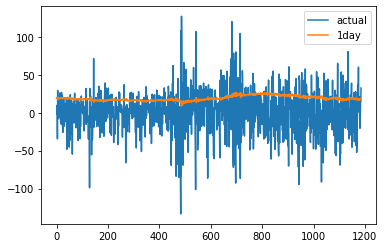

In [47]:
plt.plot(y_test_1)
plt.plot(p_test_1)
plt.legend(['actual', '1day'])
plt.show()

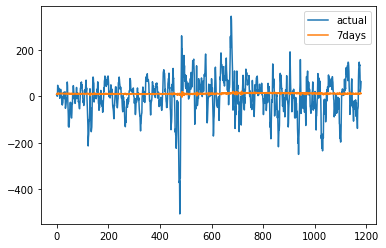

In [48]:
plt.plot(y_test_7)
plt.plot(p_test_7)
plt.legend(['actual', '7days'])
plt.show()

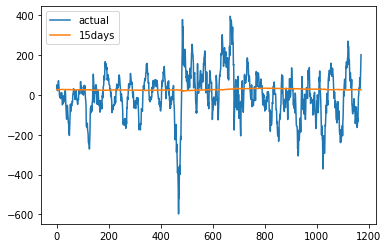

In [49]:
plt.plot(y_test_15)
plt.plot(p_test_15)
plt.legend(['actual', '15days'])
plt.show()

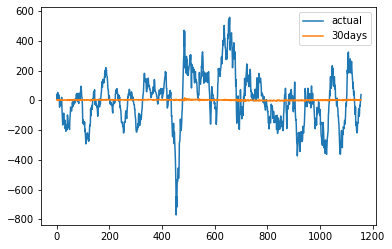

In [50]:
plt.plot(y_test_30)
plt.plot(p_test_30)
plt.legend(['actual', '30days'])
plt.show()